In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S16_data = pd.read_csv('S16_data.csv')
smoothed_predictions = pd.read_csv('smoothed_predictions.csv')
y_pred = pd.read_csv('y_pred_lr.csv')
y_test = pd.read_csv('y1_test.csv')

In [3]:
y_pred = y_pred.rename(columns={'0': 'label'})
smoothed_predictions = smoothed_predictions.rename(columns={'0': 'label'})

In [4]:
label = S16_data['label']
HRV = S16_data['HRV']
HR = S16_data['HR']
EDA = S16_data['EDA']
BVP = S16_data['BVP']
pred = y_pred.iloc[:360384]

In [5]:
label = pd.DataFrame(label)
HRV = pd.DataFrame(HRV)
HR = pd.DataFrame(HR)
EDA = pd.DataFrame(EDA)
BVP = pd.DataFrame(BVP)
pred = pd.DataFrame(pred)

In [6]:
def label_to_status(label):
    if label == 0:
        return 'Stand By'
    elif label == 1:
        return 'Stress Detected'
    else:
        return 'Unknown'  # You can handle other cases if needed

# Apply the function to create a new column 'status'
pred['status'] = pred['label'].apply(label_to_status)

In [7]:
replacement_text = 'Stress Event Duration = 4:21'

# Slice the DataFrame and set the value of 'status' column for the selected rows
pred.loc[156640:200000, 'status'] = replacement_text

C:\Users\User\AppData\Local\Temp/ipykernel_24452/2883578819.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(tick)}' for tick in new_ticks])


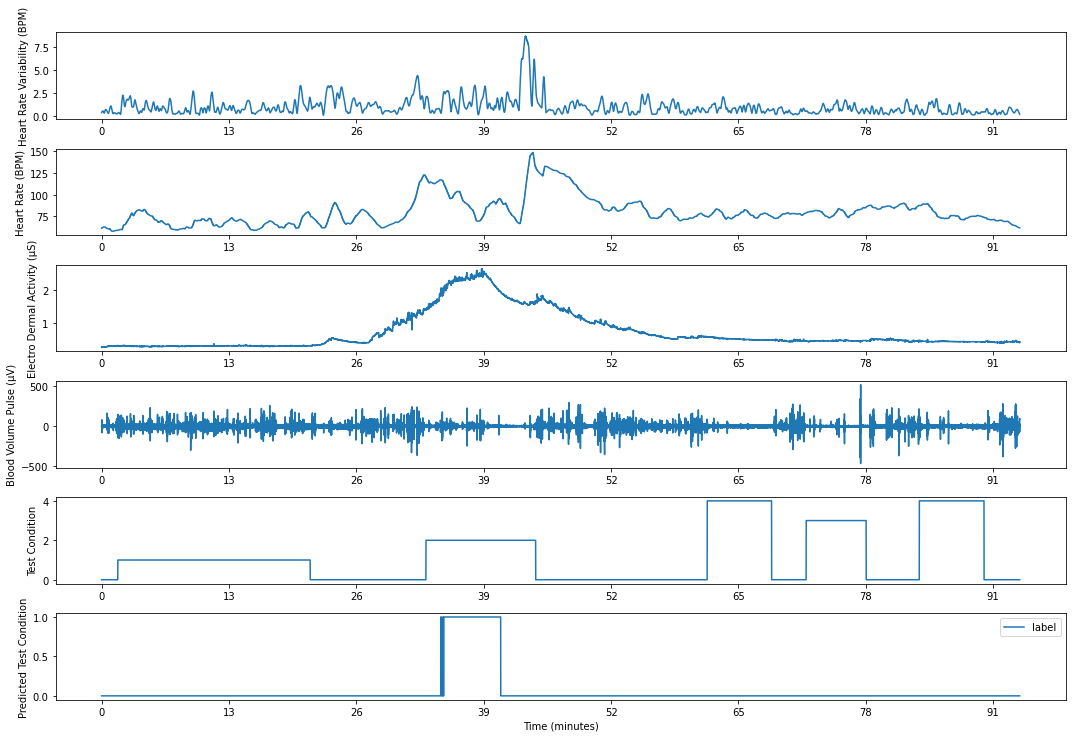

In [8]:
fig, axs = plt.subplots(6, 1, figsize=(15, 10))  # 5 rows, 1 column

# Plot the first DataFrame
S16_data['HRV'].plot(ax=axs[0])  # Plot on the first subplot (top)
axs[0].set_ylabel('Heart Rate Variability (BPM)')  # Set y-axis label for the first subplot

# Plot the second DataFrame
S16_data['HR'].plot(ax=axs[1])  
axs[1].set_ylabel('Heart Rate (BPM)')  # Set y-axis label for the second subplot

# Plot the third DataFrame
S16_data['EDA'].plot(ax=axs[2]) 
axs[2].set_ylabel('Electro Dermal Activity (μS)')  # Set y-axis label for the third subplot

# Plot the fourth DataFrame
S16_data['BVP'].plot(ax=axs[3])  
axs[3].set_ylabel('Blood Volume Pulse (µV)')  # Set y-axis label for the fourth subplot

# Plot the fifth DataFrame
S16_data['label'].plot(ax=axs[4]) 
axs[4].set_ylabel('Test Condition')  # Set y-axis label for the fifth subplot

pred.plot(ax=axs[5])  # Plot on the first subplot (top)
axs[5].set_ylabel('Predicted Test Condition')  # Set y-axis label for the first subplot

# Set x-axis label for the last subplot
axs[-1].set_xlabel('Time (minutes)')

for ax in axs:
    current_ticks = ax.get_xticks()
    new_ticks = current_ticks / 3840
    ax.set_xticklabels([f'{int(tick)}' for tick in new_ticks])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_24452/4126911238.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{int(tick)}' for tick in new_ticks])


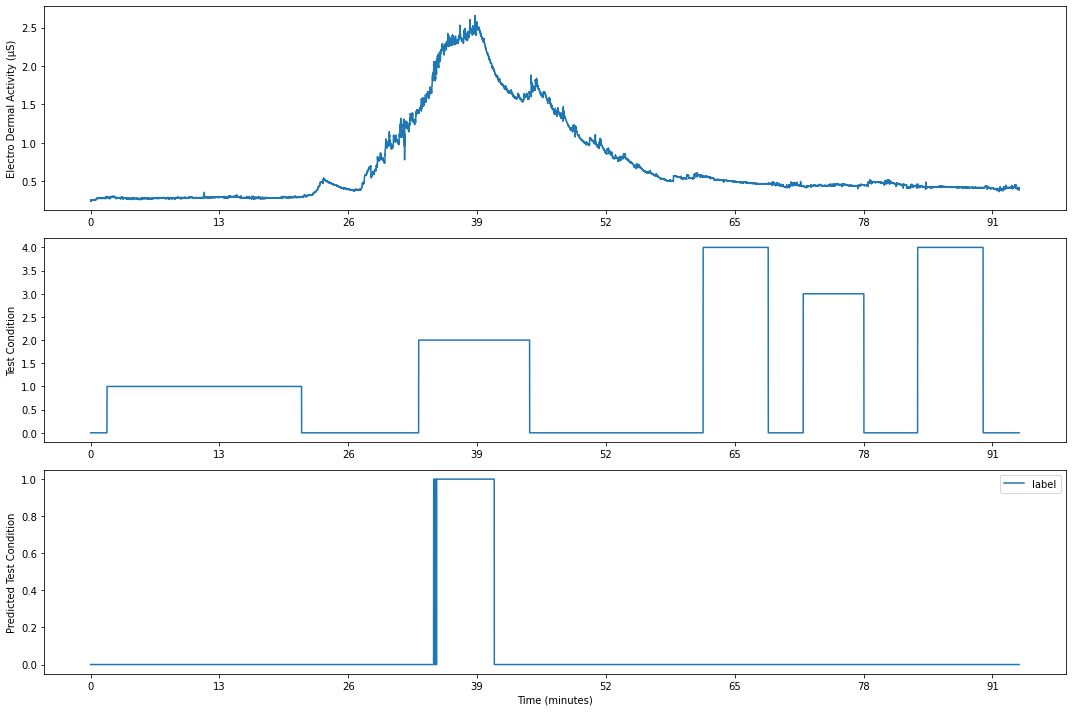

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))  # 5 rows, 1 column


# Plot the third DataFrame
S16_data['EDA'].plot(ax=axs[0]) 
axs[0].set_ylabel('Electro Dermal Activity (μS)')  # Set y-axis label for the third subplot


# Plot the fifth DataFrame
S16_data['label'].plot(ax=axs[1]) 
axs[1].set_ylabel('Test Condition')  # Set y-axis label for the fifth subplot

pred.plot(ax=axs[2])  # Plot on the first subplot (top)
axs[2].set_ylabel('Predicted Test Condition')  # Set y-axis label for the first subplot

# Set x-axis label for the last subplot
axs[-1].set_xlabel('Time (minutes)')

for ax in axs:
    current_ticks = ax.get_xticks()
    new_ticks = current_ticks / 3840
    ax.set_xticklabels([f'{int(tick)}' for tick in new_ticks])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

For next time: find the user data that is associated with the output data. Save that to the file for future use. Find a way to simultaneously present the user data and the output data and the predicted data all at the same time. 

In [9]:
from IPython.display import display, clear_output, Markdown
import time
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from PIL import Image

In [10]:
def update_plot(df, window_size, step):
    # Compute the overall range of 'EDA' values in the DataFrame
    min_value = df['EDA'].min()
    max_value = df['EDA'].max()
    
    def plot_window(i):
        plt.clf()
        window = df.iloc[i:i+window_size]
        plt.plot(window.index / 3840, window['EDA'], '-o', label='Electro Dermal Activity (μS)')
        plt.xlabel('Time (min)')
        plt.ylabel('μS')
        plt.title('Electro Dermal Activity')
        plt.legend()
        plt.ylim(min_value, max_value)  # Set y-axis limits
        plt.grid(True)
        plt.show()
    
    play = widgets.Play(value=0, min=0, max=len(df)-window_size, step=step, interval=1)
    slider = widgets.IntSlider(min=0, max=len(df)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(plot_window, i=slider)
    
    display(play)  # Display only the play widget, without the slider

# Example usage:
update_plot(EDA, window_size=70000, step=20)

interactive(children=(IntSlider(value=0, description='i', max=290384, step=20), Output()), _dom_classes=('widg…

Play(value=0, interval=1, max=290384, step=20)

In [11]:
def update_plot(df, window_size, step):
    # Compute the overall range of 'EDA' values in the DataFrame
    min_value = 0
    max_value = 4
    
    # Mapping of labels to their corresponding categories
    label_map = {0: 'Transient', 1: 'Baseline', 2: 'Stress', 3: 'Amusement', 4: 'Meditation'}
    
    def plot_window(i):
        plt.clf()
        window = df.iloc[i:i+window_size]
        plt.plot(window.index / 3840, window['label'], '-o',label='Current State')
        plt.xlabel('Time (min)')
        plt.ylabel('')
        plt.title('Test Condition')
        plt.legend()
        plt.yticks(list(label_map.keys()), list(label_map.values()))
        plt.ylim(min_value, max_value)  # Set y-axis limits
        plt.grid(True)
        plt.show()
    
    play = widgets.Play(value=0, min=0, max=len(df)-window_size, step=step, interval=1)
    slider = widgets.IntSlider(min=0, max=len(df)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(plot_window, i=slider)
    
    display(play)  # Display only the play widget, without the slider

# Example usage:
update_plot(label, window_size=70000, step=20)

interactive(children=(IntSlider(value=0, description='i', max=290384, step=20), Output()), _dom_classes=('widg…

Play(value=0, interval=1, max=290384, step=20)

In [12]:
def update_plot(df, window_size, step):
    # Compute the overall range of 'EDA' values in the DataFrame
    min_value = df['HR'].min()
    max_value = df['HR'].max()
    
    def plot_window(i):
        plt.clf()
        window = df.iloc[i:i+window_size]
        plt.plot(window.index / 3840, window['HR'], '-o', label='Heart Rate (BPM)')
        plt.xlabel('Time (min)')
        plt.ylabel('Beats Per Minute')
        plt.title('Heart Rate Activity')
        plt.legend()
        plt.ylim(min_value, max_value)  # Set y-axis limits
        plt.grid(True)
        plt.show()
    
    play = widgets.Play(value=0, min=0, max=len(df)-window_size, step=step, interval=1)
    slider = widgets.IntSlider(min=0, max=len(df)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(plot_window, i=slider)
    
    display(play)  # Display only the play widget, without the slider

# Example usage:
update_plot(HR, window_size=70000, step=20)

interactive(children=(IntSlider(value=0, description='i', max=290384, step=20), Output()), _dom_classes=('widg…

Play(value=0, interval=1, max=290384, step=20)

In [13]:
def update_plot(df, window_size, step):
    # Compute the overall range of 'EDA' values in the DataFrame
    min_value = df['label'].min()
    max_value = 2
    label_map = {0: 'Predicted No Stress Event', 1: 'Predicted Stress Event'}
    def plot_window(i):
        plt.clf()
        window = df.iloc[i:i+window_size]
        plt.plot(window.index / 3840, window['label'], '-o', label='Prediction')
        plt.xlabel('Time (min)')
        plt.ylabel('')
        plt.title('Predicted Stress Events')
        plt.legend()
        plt.yticks(list(label_map.keys()), list(label_map.values()))
        plt.ylim(min_value, max_value)  # Set y-axis limits
        plt.grid(True)
        plt.show()
    
    play = widgets.Play(value=0, min=0, max=len(df)-window_size, step=step, interval=1)
    slider = widgets.IntSlider(min=0, max=len(df)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(plot_window, i=slider)
    
    display(play)  # Display only the play widget, without the slider

# Example usage:
update_plot(pred, window_size=70000, step=20)

interactive(children=(IntSlider(value=0, description='i', max=290384, step=20), Output()), _dom_classes=('widg…

Play(value=0, interval=1, max=290384, step=20)

In [14]:
def update_plot(df, window_size, step):
    # Compute the overall range of 'EDA' values in the DataFrame
    min_value = df['BVP'].min()
    max_value = df['BVP'].max()
    
    def plot_window(i):
        plt.clf()
        window = df.iloc[i:i+window_size]
        plt.plot(window.index / 3840, window['BVP'], '-o', label='Blood Volume Pulse (µV)')
        plt.xlabel('Time (min)')
        plt.ylabel('(µV)')
        plt.title('Blood Volume Pulse')
        plt.legend()
        plt.ylim(min_value, max_value)  # Set y-axis limits
        plt.grid(True)
        plt.show()
    
    play = widgets.Play(value=0, min=0, max=len(df)-window_size, step=step, interval=1)
    slider = widgets.IntSlider(min=0, max=len(df)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(plot_window, i=slider)
    
    display(play)  # Display only the play widget, without the slider

# Example usage:
update_plot(BVP, window_size=70000, step=20)

interactive(children=(IntSlider(value=0, description='i', max=290384, step=20), Output()), _dom_classes=('widg…

Play(value=0, interval=1, max=290384, step=20)

In [15]:
def update_plot(df, window_size, step):
    # Compute the overall range of 'EDA' values in the DataFrame
    min_value = df['HRV'].min()
    max_value = df['HRV'].max()
    
    def plot_window(i):
        plt.clf()
        window = df.iloc[i:i+window_size]
        plt.plot(window.index /3840, window['HRV'], '-o', label='Heart Rate Variability (BPM)')
        plt.xlabel('Time (min)')
        plt.ylabel('(Delta BPM)')
        plt.title('Heart Rate Variability')
        plt.legend()
        plt.ylim(min_value, max_value)  # Set y-axis limits
        plt.grid(True)
        plt.show()
    
    play = widgets.Play(value=0, min=0, max=len(df)-window_size, step=step, interval=1)
    slider = widgets.IntSlider(min=0, max=len(df)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(plot_window, i=slider)
    
    display(play)  # Display only the play widget, without the slider

# Example usage:
update_plot(HRV, window_size=70000, step=20)

interactive(children=(IntSlider(value=0, description='i', max=290384, step=20), Output()), _dom_classes=('widg…

Play(value=0, interval=1, max=290384, step=20)

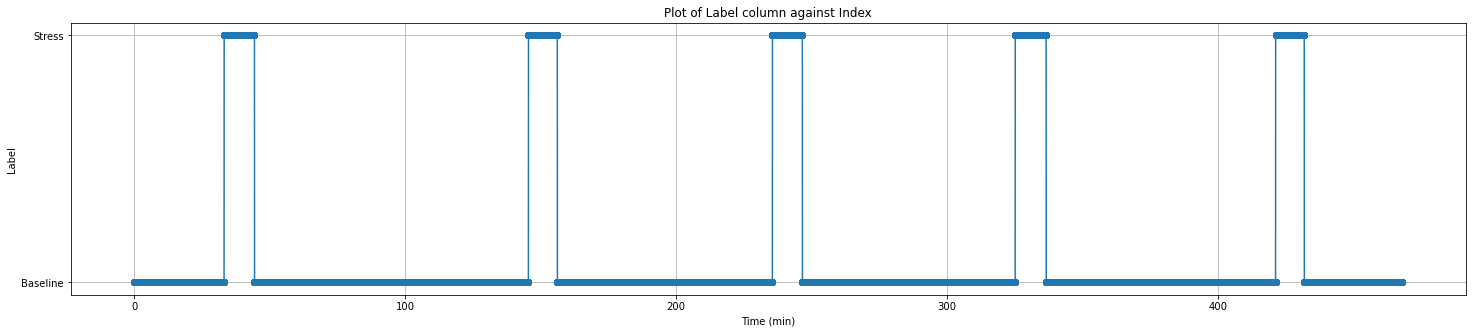

In [16]:
plt.figure(figsize=(25, 5))
plt.plot(y_test.index / 3840, y_test['label'], marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('Label')
plt.yticks([0, 1], ['Baseline', 'Stress'])
plt.title('Plot of Label column against Index')
plt.grid(True)
plt.show()

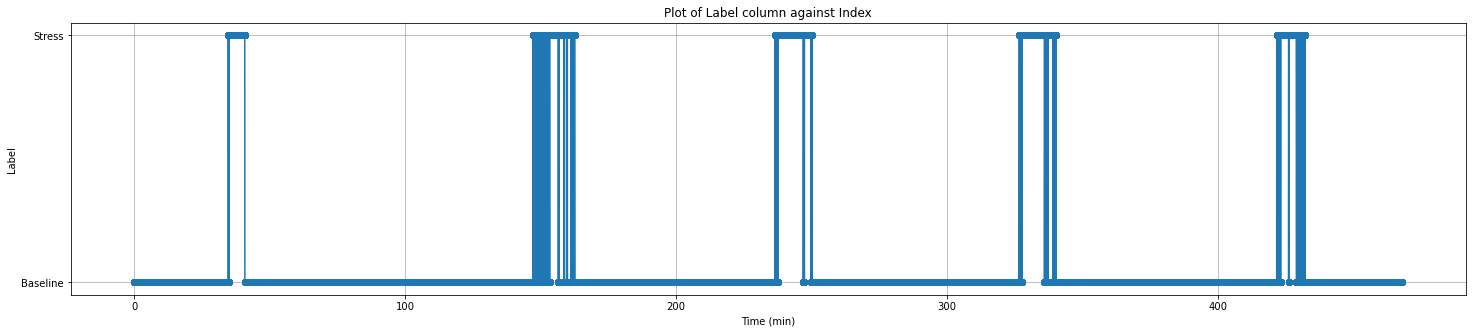

In [17]:
plt.figure(figsize=(25, 5))
plt.plot(y_pred.index / 3840, y_pred['label'], marker='o', linestyle='-')
plt.xlabel('Time (min)')
plt.ylabel('Label')
plt.yticks([0, 1], ['Baseline', 'Stress'])
plt.title('Plot of Label column against Index')
plt.grid(True)
plt.show()

In [18]:
event_length = {
    'Event': ['Event 1', 'Event 2', 'Event 3', 'Event 4', 'Event 5'],
    'Test (64Hz)': [33333, 33333, 33333, 33333, 33333],
    'Predicted (64Hz)': [16666, 54166, 41666, 42000, 37500]
}

event_length = pd.DataFrame(event_length)

event_length['Percent_Error'] = ((event_length['Predicted (64Hz)'] - event_length['Test (64Hz)']) / event_length['Test (64Hz)']) * 100

event_length['Predicted (sec)'] = event_length['Predicted (64Hz)'] / 64
event_length['Test (sec)'] = event_length['Test (64Hz)'] / 64

event_length['Predicted (min)'] = event_length['Predicted (sec)'] / 64
event_length['Test (min)'] = event_length['Test (sec)'] / 64

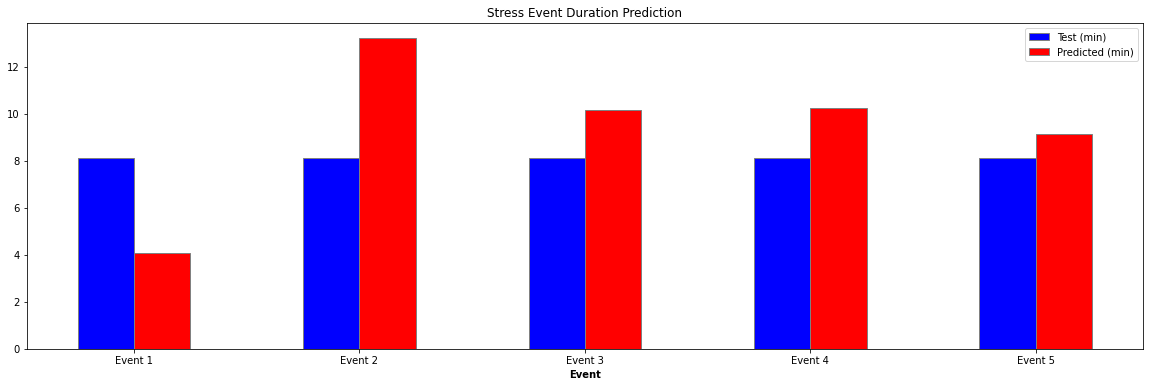

In [19]:
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(event_length))

plt.figure(figsize=(20, 6))

# Plot bars
plt.bar(r1, event_length['Test (min)'], color='b', width=bar_width, edgecolor='grey', label='Test (min)')
plt.bar([x + bar_width for x in r1], event_length['Predicted (min)'], color='r', width=bar_width, edgecolor='grey', label='Predicted (min)')

# Add xticks on the middle of the group bars
plt.xlabel('Event', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in r1], event_length['Event'])

# Add a legend
plt.legend()
plt.title('Stress Event Duration Prediction')

# Show the plot
plt.show()

In [20]:
def update_text(pred, window_size, step):
    def display_status(i):
        clear_output(wait=True)
        window = pred.iloc[i:i+window_size]
        markdown_text = ""
        for index, row in window.iterrows():
            timestamp_minutes = index / 3840
            markdown_text += f"- **Timestamp:** {timestamp_minutes:.2f} Minutes, **Status:** {row['status']}<br>"
        display(Markdown(markdown_text))
    
    play = widgets.Play(value=0, min=0, max=len(pred)-window_size, step=step, interval=1000)
    slider = widgets.IntSlider(min=0, max=len(pred)-window_size, step=step)
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    widgets.interact(display_status, i=slider)
    
    display(play)

# Example usage:
update_text(pred, window_size=1, step=5000)

interactive(children=(IntSlider(value=0, description='i', max=360383, step=5000), Output()), _dom_classes=('wi…

Play(value=0, interval=1000, max=360383, step=5000)